In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'

# get all data

In [2]:
# get data
all_data = []
all_names = []
files =glob("rool_golld_mp_data/*events.csv")
for file in files:
    df = pd.read_csv(file)
    vals = df.calibrated_values.to_numpy()
    vals = vals[~np.isnan(vals)]
    name = file[23:-11]
    all_data.extend(vals)
    all_names.extend([name]*len(vals))
all_df_cage = pd.DataFrame(np.array([all_data,all_names]).T,columns=['nt','name'])
all_df_cage = all_df_cage.astype({'nt':float})
print(all_df_cage.name.unique())

all_data = []
all_names = []
files =glob("ole_raiA_mp_data/*events.csv")
for file in files:
    df = pd.read_csv(file)
    vals = df.calibrated_values.to_numpy()
    vals = vals[~np.isnan(vals)]
    name = file[21:-11]
    all_data.extend(vals)
    all_names.extend([name]*len(vals))
all_df = pd.DataFrame(np.array([all_data,all_names]).T,columns=['nt','name'])
all_df = all_df.astype({'nt':float})
print(all_df.name.unique())

['gollda-10ulbuffer-2ulblack-2weeks'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer-try2'
 'rool120-gollda-10ulbuffer-2ulbuffer'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer' 'sample38-10x'
 'rool120-10ulbuffer-2ulblack-2weeks'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer-try2'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer'
 'rool120-gollda-10ulbuffer-2ulbuffer_collect2' 'rnaladder_startround3'
 'sample28--10x']
['OLE_100mM-MgCl2' 'OLE_10mM-MgCl2_v1' 'RNAladder_10mM-MgCl2_200mM-NaCl'
 'RNAladder_0mM-MgCl2_200mM-NaCl' 'raiA_01_v2' 'raiA_02_v2'
 'RNAladder_100mM-MgCl2_v3' 'RNAladder_1percentEtOH' 'RNAladder_0mM-MgCl2'
 'RNAladder_10mM-MgCl2_200mM-KCl' 'OLE_0mM-MgCl2_200mM-KCl'
 'OLE_0mM-MgCl2' 'RNAladder_0mM-MgCl2_200mM-KCl' 'raiA_01_v1'
 'OLE_0mM-MgCl2_200mM-NaCl' 'RNAladder_10mM-MgCl2' 'raiA_02_v1'
 'RNAladder_5percentEtOH' 'OLE_10mM-MgCl2_200mM-KCl' 'OLE_10mM-MgCl2_v2'
 'OLE_10mM-MgCl2_200mM-NaCl' 'OLE_1mM-MgCl2' 'buffer_10mM-MgCl2'
 'OLE_1percentEtOH' 'RNAladder_100mM-MgCl2_v2' 'OLE_5percen

# Plot main MP data

['gollda-10ulbuffer-2ulblack-2weeks'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer-try2'
 'rool120-gollda-10ulbuffer-2ulbuffer'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer' 'sample38-10x'
 'rool120-10ulbuffer-2ulblack-2weeks'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer-try2'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer'
 'rool120-gollda-10ulbuffer-2ulbuffer_collect2' 'rnaladder_startround3'
 'sample28--10x' 'OLE_100mM-MgCl2' 'OLE_10mM-MgCl2_v1'
 'RNAladder_10mM-MgCl2_200mM-NaCl' 'RNAladder_0mM-MgCl2_200mM-NaCl'
 'raiA_01_v2' 'raiA_02_v2' 'RNAladder_100mM-MgCl2_v3'
 'RNAladder_1percentEtOH' 'RNAladder_0mM-MgCl2'
 'RNAladder_10mM-MgCl2_200mM-KCl' 'OLE_0mM-MgCl2_200mM-KCl'
 'OLE_0mM-MgCl2' 'RNAladder_0mM-MgCl2_200mM-KCl' 'raiA_01_v1'
 'OLE_0mM-MgCl2_200mM-NaCl' 'RNAladder_10mM-MgCl2' 'raiA_02_v1'
 'RNAladder_5percentEtOH' 'OLE_10mM-MgCl2_200mM-KCl' 'OLE_10mM-MgCl2_v2'
 'OLE_10mM-MgCl2_200mM-NaCl' 'OLE_1mM-MgCl2' 'buffer_10mM-MgCl2'
 'OLE_1percentEtOH' 'RNAladder_100mM-MgCl2_v2' 'OLE_5percent

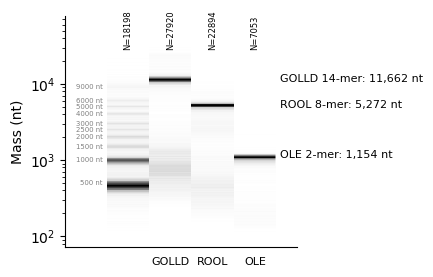

In [3]:
fig = plt.figure(figsize=(3, 3))
name_mapping = { 'rnaladder_startround3':'' ,
                'gollda-10ulbuffer-2ulblack-2weeks':'GOLLD',
                'sample38-10x':'ROOL',
                'OLE_10mM-MgCl2_v2':'OLE',#'10 mM MgCl2',
                }
                

plot_df = pd.concat([all_df_cage.copy(),all_df.copy()])#[all_df.name.isin(name_mapping.keys())]
print(plot_df.name.unique())
for i,name in enumerate(name_mapping.keys()):
    if 'RNAladder' in name:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
        plt.text(i,20000,f'L',rotation=0,size=14,ha='center')
    else:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys",#"Blues", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
    plt.text(i,30000,f'N={len(plot_df[plot_df.name == name])}',rotation=90,size=6,ha='center')
t = plt.gca().set_xticks( plt.gca().get_xticks(),name_mapping.values())


for ladder in [500,1000,1500,2000,2500,3000,4000,5000,6000,9000]:
    plt.text(-0.6,ladder,f'{ladder} nt',c='grey',size=5,va='center',ha='right')

plt.text(len(name_mapping)-0.4,659*8,f'ROOL 8-mer: 5,272 nt',c='black',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,833*14,f'GOLLD 14-mer: 11,662 nt',c='black',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,577*2,f'OLE 2-mer: 1,154 nt',c='black',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))

plt.gca().spines[['right', 'top']].set_visible(False)
t = plt.xticks(rotation=0,size=8)
t = plt.xlim(-1.5,len(name_mapping))
plt.gca().tick_params(axis="x", bottom=False)
plt.ylabel('Mass (nt)')
plt.xlabel('')
plt.savefig('rool_ole_golld_MP.png',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('rool_ole_golld_MP.svg',dpi=400, bbox_inches="tight", transparent=True)


# MP OLE conditions

In [4]:
df = pd.read_csv('ole_raiA_mp_data/OLE_MP_summary.csv')

buffers = ['0mM MgCl2', '1mM MgCl2', '10mM MgCl2 v2', '100mM MgCl2',
 '0mM MgCl2 200mM NaCl','0mM MgCl2 200mM KCl', 
  '10. 10mM MgCl2 200mM NaCl','10mM MgCl2 200mM KCl',
           '1% EtOH', '5% EtOH']
labels = {'0mM MgCl2':'0\n0\n0\n0', 
 '1mM MgCl2':'1\n0\n0\n0', 
 '10mM MgCl2 v2':'10\n0\n0\n0', 
 '100mM MgCl2':'100\n0\n0\n0',
 '0mM MgCl2 200mM NaCl':'0\n200\n0\n0',
 '0mM MgCl2 200mM KCl':'0\n0\n200\n0', 
  '10. 10mM MgCl2 200mM NaCl':'10\n200\n0\n0',
 '10mM MgCl2 200mM KCl':'10\n0\n200\n0',
           '1% EtOH':'10\n0\n0\n1', 
           '5% EtOH':'10\n0\n0\n5'
}

/tmp/ipykernel_82934/4021734851.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  t = ax.set_xticklabels(labels.values(),rotation=0)


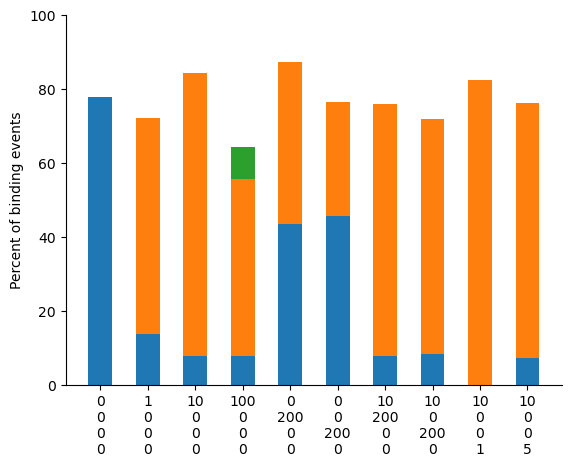

In [5]:
df_plot = df[df.Buffer.isin(buffers)]
mons = df_plot[df_plot['Peak identity']=='monomer'].groupby('Buffer')['Percent total'].sum()
dims = df_plot[df_plot['Peak identity']=='dimer'].groupby('Buffer')['Percent total'].sum()
others = df_plot[~df_plot['Peak identity'].isin(['monomer','dimer'])].groupby('Buffer')['Percent total'].sum()
counts = {"monomer": [mons[buf] if buf in mons else 0 for buf in buffers],
          "dimer": [dims[buf] if buf in dims else 0 for buf in buffers],
           "higher-order": [others[buf] if buf in others else 0 for buf in buffers],#df.groupby('Buffer')['Percent total'].sum().to_numpy(),
          }
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(buffers))

for label, count in counts.items():
    p = ax.bar(labels.values(), count, width, label=label, bottom=bottom)
    bottom += count
plt.ylim(0,100)
t = ax.set_xticklabels(labels.values(),rotation=0)
plt.ylabel('Percent of binding events')
ax.spines[['right', 'top']].set_visible(False)


/tmp/ipykernel_82934/714248045.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  t = ax.set_xticklabels(labels.values(),rotation=0)


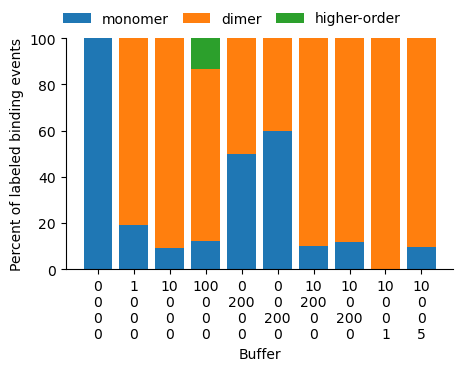

In [6]:
total_labeled = df.groupby('Buffer')['Absolute count'].sum().to_dict()
df['Percent labeled'] = df.apply(lambda row: 100*row['Absolute count']/total_labeled[row.Buffer], axis=1)

df_plot = df[df.Buffer.isin(buffers)]
mons = df_plot[df_plot['Peak identity']=='monomer'].groupby('Buffer')['Percent labeled'].sum()
dims = df_plot[df_plot['Peak identity']=='dimer'].groupby('Buffer')['Percent labeled'].sum()
others = df_plot[~df_plot['Peak identity'].isin(['monomer','dimer'])].groupby('Buffer')['Percent labeled'].sum()
counts = {"monomer": [mons[buf] if buf in mons else 0 for buf in buffers],
          "dimer": [dims[buf] if buf in dims else 0 for buf in buffers],
           "higher-order": [others[buf] if buf in others else 0 for buf in buffers]}

fig, ax = plt.subplots(figsize=(5,3))
bottom = np.zeros(len(buffers))
for label, count in counts.items():
    p = ax.bar(labels.values(), count, 0.8, label=label, bottom=bottom)
    bottom += count
plt.ylim(0,100)
t = ax.set_xticklabels(labels.values(),rotation=0)
plt.ylabel('Percent of labeled binding events')
plt.xlabel('Buffer')
ax.spines[['right', 'top']].set_visible(False)
fig.legend(loc='outside upper center',ncols=3,frameon=False,columnspacing=1)
plt.savefig('ole_MP_summary.svg',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('ole_MP_summary.png',dpi=400, bbox_inches="tight", transparent=True)

['OLE_100mM-MgCl2' 'RNAladder_10mM-MgCl2_200mM-NaCl'
 'RNAladder_0mM-MgCl2_200mM-NaCl' 'RNAladder_1percentEtOH'
 'RNAladder_0mM-MgCl2' 'RNAladder_10mM-MgCl2_200mM-KCl'
 'OLE_0mM-MgCl2_200mM-KCl' 'OLE_0mM-MgCl2' 'RNAladder_0mM-MgCl2_200mM-KCl'
 'OLE_0mM-MgCl2_200mM-NaCl' 'RNAladder_10mM-MgCl2'
 'RNAladder_5percentEtOH' 'OLE_10mM-MgCl2_200mM-KCl' 'OLE_10mM-MgCl2_v2'
 'OLE_10mM-MgCl2_200mM-NaCl' 'OLE_1mM-MgCl2' 'buffer_10mM-MgCl2'
 'OLE_1percentEtOH' 'OLE_5percentEtOH' 'RNAladder_100mM-MgCl2_v1'
 'RNAladder_1mM-MgCl2']


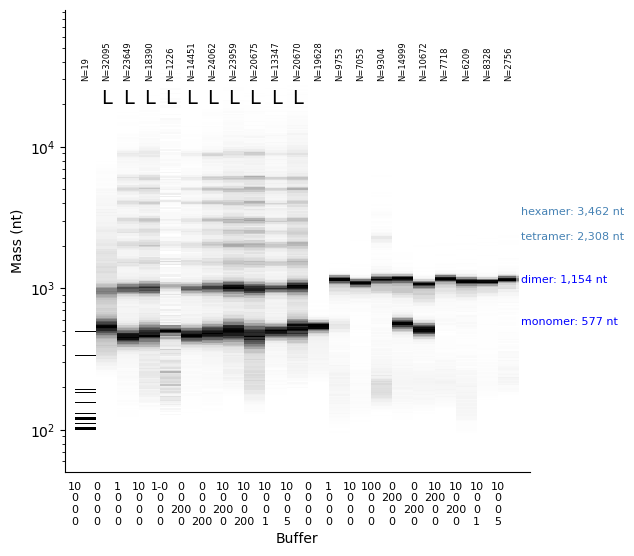

In [7]:
fig = plt.figure(figsize=(6, 6))

name_mapping = { 'buffer_10mM-MgCl2':'' ,
                'RNAladder_0mM-MgCl2':'',
                'OLE_0mM-MgCl2':'0\n0\n0\n0',#'0 mM MgCl2',
                'RNAladder_1mM-MgCl2':'',
                'OLE_1mM-MgCl2':'1\n0\n0\n0',#'1 mM MgCl2',
               'RNAladder_10mM-MgCl2':'',
                # 'OLE_10mM-MgCl2_v1':'10 mM MgCl2', lower cocnetration
                'OLE_10mM-MgCl2_v2':'10\n0\n0\n0',#'10 mM MgCl2',
               'RNAladder_100mM-MgCl2_v1':'',
                #'RNAladder_100mM-MgCl2_v2':'', these were other attempts but all just seem to cause aggregation
                #'RNAladder_100mM-MgCl2_v3':'',
                'OLE_100mM-MgCl2':'100\n0\n0\n0',#'100 mM MgCl2',
               'RNAladder_0mM-MgCl2_200mM-NaCl':'',
                'OLE_0mM-MgCl2_200mM-NaCl' :'0\n200\n0\n0',#'0 mM MgCl2 \n 200 mM NaCl \n 0 mM KCl',
                 'RNAladder_0mM-MgCl2_200mM-KCl':'',
                'OLE_0mM-MgCl2_200mM-KCl':'0\n0\n200\n0',#'0 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl',
                'RNAladder_10mM-MgCl2_200mM-NaCl':'',
                'OLE_10mM-MgCl2_200mM-NaCl':'10\n200\n0\n0',#'10 mM MgCl2 \n 200 mM NaCl \n 0 mM KCl',
               'RNAladder_10mM-MgCl2_200mM-KCl':'',
                'OLE_10mM-MgCl2_200mM-KCl':'10\n0\n200\n0',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl',
                'RNAladder_1percentEtOH':'',
                'OLE_1percentEtOH':'10\n0\n0\n1',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl\n 1% EtOH',
                'RNAladder_5percentEtOH':'',
                'OLE_5percentEtOH':'10\n0\n0\n5',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl\n 5% EtOH',
               }
name_mapping = { 'buffer_10mM-MgCl2':'10\n0\n0\n0' ,
                'RNAladder_0mM-MgCl2':'0\n0\n0\n0',
                'RNAladder_1mM-MgCl2':'1\n0\n0\n0',
                'RNAladder_10mM-MgCl2':'10\n0\n0\n0',
                'RNAladder_100mM-MgCl2_v1':'1-0\n0\n0\n0',
                'RNAladder_0mM-MgCl2_200mM-NaCl':'0\n0\n200\n0',
                'RNAladder_0mM-MgCl2_200mM-KCl':'0\n0\n0\n200',
                'RNAladder_10mM-MgCl2_200mM-NaCl':'10\n0\n200\n0',
                'RNAladder_10mM-MgCl2_200mM-KCl':'10\n0\n0\n200',
                'RNAladder_1percentEtOH':'10\n0\n0\n1',
                'RNAladder_5percentEtOH':'10\n0\n0\n5',
                'OLE_0mM-MgCl2':'0\n0\n0\n0',#'0 mM MgCl2',
                'OLE_1mM-MgCl2':'1\n0\n0\n0',#'1 mM MgCl2',
                # 'OLE_10mM-MgCl2_v1':'10 mM MgCl2', lower cocnetration
                'OLE_10mM-MgCl2_v2':'10\n0\n0\n0',#'10 mM MgCl2',
                #'RNAladder_100mM-MgCl2_v2':'', these were other attempts but all just seem to cause aggregation
                #'RNAladder_100mM-MgCl2_v3':'',
                'OLE_100mM-MgCl2':'100\n0\n0\n0',#'100 mM MgCl2',
                'OLE_0mM-MgCl2_200mM-NaCl' :'0\n200\n0\n0',#'0 mM MgCl2 \n 200 mM NaCl \n 0 mM KCl',
                'OLE_0mM-MgCl2_200mM-KCl':'0\n0\n200\n0',#'0 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl',
                'OLE_10mM-MgCl2_200mM-NaCl':'10\n200\n0\n0',#'10 mM MgCl2 \n 200 mM NaCl \n 0 mM KCl',
                'OLE_10mM-MgCl2_200mM-KCl':'10\n0\n200\n0',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl',
                'OLE_1percentEtOH':'10\n0\n0\n1',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl\n 1% EtOH',
                'OLE_5percentEtOH':'10\n0\n0\n5',#'10 mM MgCl2 \n 0 mM NaCl \n 200 mM KCl\n 5% EtOH',
               }
plot_df = all_df[all_df.name.isin(name_mapping.keys())]
print(plot_df.name.unique())

for i,name in enumerate(name_mapping.keys()):
    if 'RNAladder' in name:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
        plt.text(i,20000,f'L',rotation=0,size=14,ha='center')
    else:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys",#"Blues", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
    plt.text(i,30000,f'N={len(plot_df[plot_df.name == name])}',rotation=90,size=6,ha='center')
t = plt.gca().set_xticks([x-0.5 for x in plt.gca().get_xticks()],name_mapping.values())

plt.text(len(name_mapping)-0.4,577,f'monomer: 577 nt',c='blue',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,577*2,f'dimer: 1,154 nt',c='blue',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,577*4,f'tetramer: 2,308 nt',c='steelblue',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,577*6,f'hexamer: 3,462 nt',c='steelblue',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))

plt.gca().spines[['right', 'top']].set_visible(False)
t = plt.xticks(rotation=0,size=8)
t = plt.xlim(-1,len(name_mapping))
plt.gca().tick_params(axis="x", bottom=False)
plt.xlabel('Buffer')
plt.ylabel('Mass (nt)')
plt.savefig('ole_MP.png',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('ole_MP.svg',dpi=400, bbox_inches="tight", transparent=True)

# ROOL GOLLD mixture data

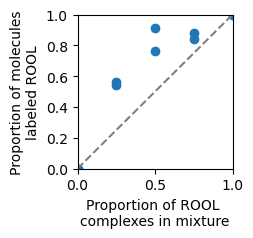

In [11]:
plt.figure(figsize=(2,2))
df = pd.read_csv('rool_golld_mp_data/mix_table_summary.csv')
plt.scatter(df.ROOL_amount,df.ROOL_percent_labeled)
x = np.linspace(0, 1, 100)
plt.plot(x, x,'--',color='grey')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Proportion of ROOL \ncomplexes in mixture')
plt.ylabel('Proportion of molecules\nlabeled ROOL')
plt.savefig('cage_MP_mixture_nocorrection.svg',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('cage_MP_mixture_nocorrection.png',dpi=400, bbox_inches="tight", transparent=True)

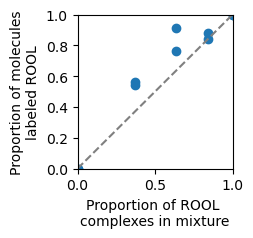

In [12]:
#correct_for_complex_formation = (df.ROOL_percent_labeled*14)/((df.ROOL_percent_labeled*14)+((1-df.ROOL_percent_labeled)*8))
correct_for_complex_formation = (df.ROOL_amount*14)/((df.ROOL_amount*14)+((1-df.ROOL_amount)*8))
plt.figure(figsize=(2,2))
#plt.scatter(df.ROOL_amount,correct_for_complex_formation)
plt.scatter(correct_for_complex_formation,df.ROOL_percent_labeled)
x = np.linspace(0, 1, 100)
plt.plot(x, x,'--',color='grey')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Proportion of ROOL \ncomplexes in mixture')
plt.ylabel('Proportion of molecules\nlabeled ROOL')
plt.savefig('cage_MP_mixture.svg',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('cage_MP_mixture.png',dpi=400, bbox_inches="tight", transparent=True)

['gollda-10ulbuffer-2ulblack-2weeks'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer-try2'
 'rool120-gollda-10ulbuffer-2ulbuffer'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer' 'sample38-10x'
 'rool120-10ulbuffer-2ulblack-2weeks'
 'rool120-25-gollda-75-10ulbuffer-2ulbuffer-try2'
 'rool120-75-gollda-25-10ulbuffer-2ulbuffer'
 'rool120-gollda-10ulbuffer-2ulbuffer_collect2' 'rnaladder_startround3'
 'sample28--10x']


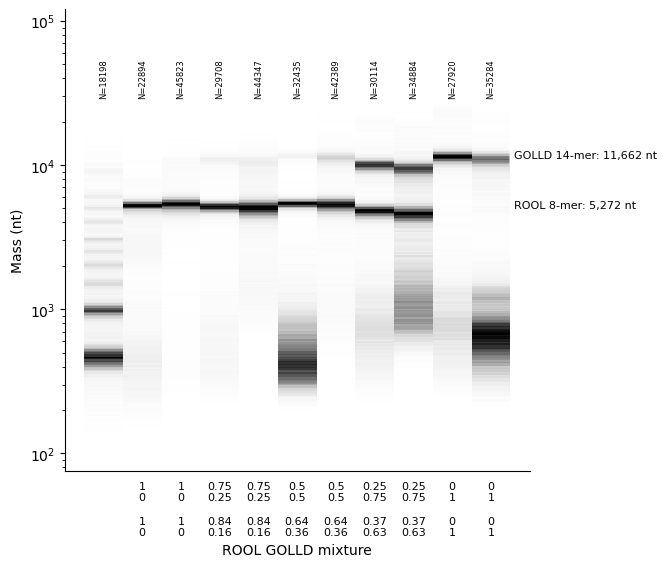

In [10]:

fig = plt.figure(figsize=(6, 6))
name_mapping = { 'rnaladder_startround3':'' ,
                'sample38-10x':'1\n0\n\n1\n0',
                'rool120-10ulbuffer-2ulblack-2weeks':'1\n0\n\n1\n0',
                'rool120-75-gollda-25-10ulbuffer-2ulbuffer':'0.75\n0.25\n\n0.84\n0.16',
                 'rool120-75-gollda-25-10ulbuffer-2ulbuffer-try2':'0.75\n0.25\n\n0.84\n0.16',
                'rool120-gollda-10ulbuffer-2ulbuffer':'0.5\n0.5\n\n0.64\n0.36',
                'rool120-gollda-10ulbuffer-2ulbuffer_collect2':'0.5\n0.5\n\n0.64\n0.36',
                'rool120-25-gollda-75-10ulbuffer-2ulbuffer':'0.25\n0.75\n\n0.37\n0.63',
                 'rool120-25-gollda-75-10ulbuffer-2ulbuffer-try2':'0.25\n0.75\n\n0.37\n0.63',
                'gollda-10ulbuffer-2ulblack-2weeks':'0\n1\n\n0\n1',
                'sample28--10x':'0\n1\n\n0\n1',
                }

plot_df = all_df_cage.copy()#[all_df.name.isin(name_mapping.keys())]
print(plot_df.name.unique())
for i,name in enumerate(name_mapping.keys()):
    if 'RNAladder' in name:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
        plt.text(i,20000,f'L',rotation=0,size=14,ha='center')
    else:
        sns.histplot(data=plot_df[plot_df.name == name], binwidth=0.01, # 10,50
                     y='nt', x='name',
                     legend=False, cmap="Greys",#"Blues", 
                     norm='linear', stat='density',  common_norm=False, # plot density, sum to 1
                    log_scale=(False,True))
    plt.text(i,30000,f'N={len(plot_df[plot_df.name == name])}',rotation=90,size=6,ha='center')
t = plt.gca().set_xticks( plt.gca().get_xticks(),name_mapping.values())


plt.text(len(name_mapping)-0.4,659*8,f'ROOL 8-mer: 5,272 nt',c='black',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))
plt.text(len(name_mapping)-0.4,833*14,f'GOLLD 14-mer: 11,662 nt',c='black',size=8,va='center', bbox=dict(facecolor='white', alpha=0.5,linewidth=0))

plt.gca().spines[['right', 'top']].set_visible(False)
t = plt.xticks(rotation=0,size=8)
t = plt.xlim(-1,len(name_mapping))
plt.gca().tick_params(axis="x", bottom=False)
plt.xlabel('ROOL GOLLD mixture')
plt.ylabel('Mass (nt)')
plt.savefig('ROOL_GOLLD_mixture_MP_gel.png',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('ROOL_GOLLD_mixture_MP_gel.svg',dpi=400, bbox_inches="tight", transparent=True)
